# The goal of this project is to evaluate company X's Data of Employee so as to determine why employees are leaving the Comapany

In [1]:
#importing the requires library
import numpy as np
import pandas as pd

In [2]:
#For visual
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#Reading in the data
data = pd.read_excel('Employee.xlsx', sheet_name=None)

In [4]:
sheets = [sh for sh in data]
sheets

['INFO', 'Existing employees', 'Employees who have left', 'Presentation']

In [5]:
#Employees in the company
data['Existing employees'].head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [6]:
#Employees that have left the company
data['Employees who have left'].head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


We will create another column to represent employees that have left an still in the company. We then merge them together

In [9]:
exist_emp = data['Existing employees']
exist_emp['exist'] = 1
left_emp = data['Employees who have left']
left_emp['exist'] = 0
all_emp = pd.concat([exist_emp,left_emp])
all_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,exist
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


In [10]:
print(len(exist_emp),len(left_emp),len(all_emp))

11428 3571 14999


In [11]:
all_emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
exist                    14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [12]:
all_emp.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,exist
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.761917
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
all_emp.groupby('exist').describe()

Emp ID                                                               \
         count         mean          std     min      25%     50%       75%   
exist                                                                         
0       3571.0  6500.439653  6266.484705     1.0   893.50  1786.0  12678.50   
1      11428.0  7812.340742  3453.947461  2001.0  4857.75  7714.5  10571.25   

               satisfaction_level            ... Work_accident       \
           max              count      mean  ...           75%  max   
exist                                        ...                      
0      14999.0             3571.0  0.440098  ...           0.0  1.0   
1      14211.0            11428.0  0.666810  ...           0.0  1.0   

      promotion_last_5years                                               
                      count      mean       std  min  25%  50%  75%  max  
exist                                                                     
0                    3571.0  0.005321  0.072759  0.0  0.0  0.0  0.0  1.0  
1                   11428.0  0.026251  0.159889  0.0  0.0  0.0  0.0  1.0  

[2 rows x 64 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002603328B2C8>,
      dtype=object)

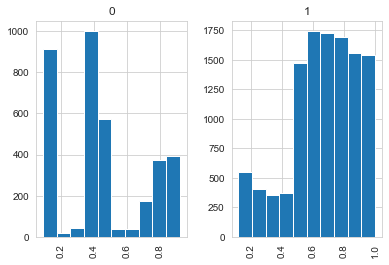

In [14]:
#Let's Inspect the Satisfactory level of Employee
all_emp.hist(column='satisfaction_level', by='exist')

We can see that employees leaving are not satisfied with their Job

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026031AF5F48>,
      dtype=object)

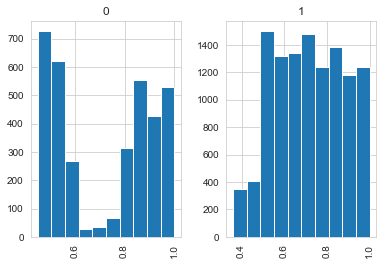

In [15]:
#Let's Inspect their last evelaution
all_emp.hist( column='last_evaluation', by='exist')

Company X should also take note of this 

Let's Check the relationship between the time spent in the company and the number of projects

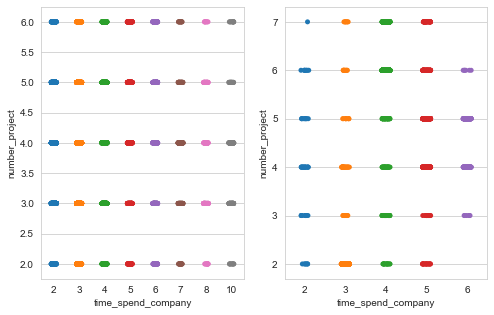

In [16]:
fig,axes = plt.subplots(1,2,figsize=(8,5))
sns.stripplot(x='time_spend_company', y = 'number_project', data=exist_emp, ax=axes[0])
sns.stripplot(x='time_spend_company', y = 'number_project', data=left_emp, ax=axes[1])

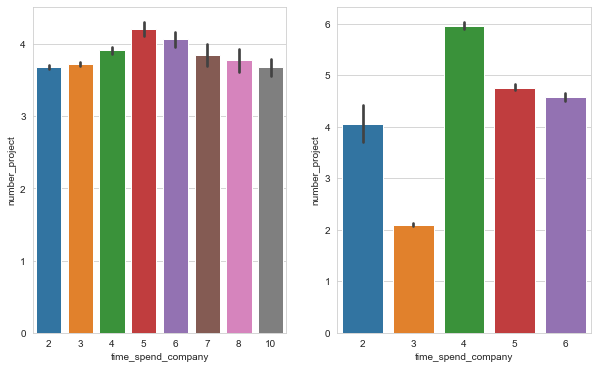

In [17]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
sns.barplot(x='time_spend_company', y = 'number_project', data=exist_emp, ax=axes[0])
sns.barplot(x='time_spend_company', y = 'number_project', data=left_emp, ax=axes[1])

From the chat Above, we can see that stating from the 4th year. Employees that have left the company were given sligthly more projects compared to those still existing

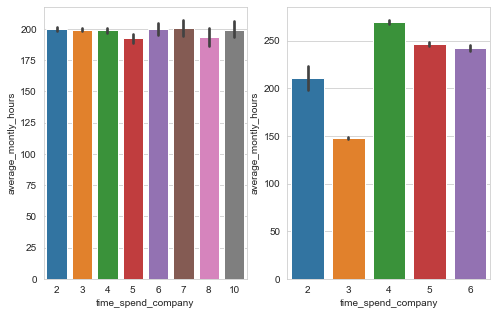

In [18]:
#Number of projects versus Average monthly hour
fig,axes = plt.subplots(1,2,figsize=(8,5))
sns.barplot(x='time_spend_company', y = 'average_montly_hours', data=exist_emp, ax=axes[0])
sns.barplot(x='time_spend_company', y = 'average_montly_hours', data=left_emp, ax=axes[1])

None of the existing employees has an average monthly hour above 200. Could employees be leaving beacuse of overwork?

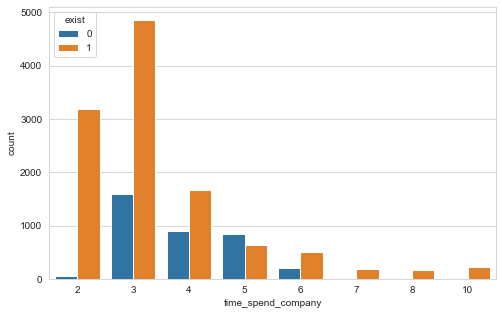

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='time_spend_company',data=all_emp, hue='exist')

A reasonable number of employees left in the third year

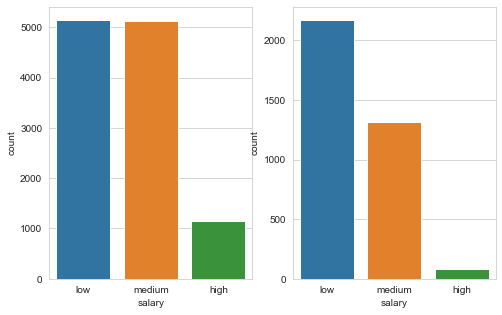

In [20]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.countplot(exist_emp['salary'], ax=axes[0])
sns.countplot(left_emp['salary'], ax=axes[1])

On avearge we have few employees been paid well, an fewer on the absentee list.

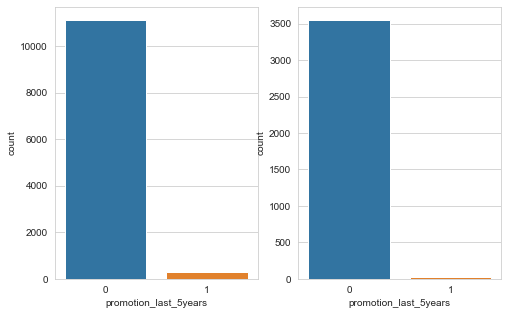

In [21]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.countplot(exist_emp['promotion_last_5years'], ax=axes[0])
sns.countplot(left_emp['promotion_last_5years'], ax=axes[1])

The company hardly promotes employees

Now for us to determine employees likely to leave, we need a model that predicts if an employee will leave or not based on his individual data. At any point we know employees on the verge of leaving and we decide what to do.

## Machine Learning

To accomplish this task, we will use the sklearn Library

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
all_emp['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [24]:
all_emp['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [25]:
#Let's use one hot encoding 
department = pd.get_dummies(all_emp['dept'], drop_first=True)
sal = pd.get_dummies(all_emp['salary'], drop_first=True)

In [26]:
to_drop = ['Emp ID','dept','salary']
new_data = all_emp.drop(to_drop, axis=1)
new_data = pd.concat([new_data,department,sal], axis=1)
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,exist,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.58,0.74,4,215,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2,202,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0.45,0.69,5,193,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0.78,0.82,5,247,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.49,0.60,3,214,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [27]:
X = new_data.drop(['exist'], axis=1)
y = new_data['exist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 357  678]
 [ 246 3219]]
              precision    recall  f1-score   support

           0       0.59      0.34      0.44      1035
           1       0.83      0.93      0.87      3465

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



The accuracy of our model is not good. Can we do better?

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [32]:
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

[[ 957   78]
 [  20 3445]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1035
           1       0.98      0.99      0.99      3465

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Impressive!!! Judging by the f1 score. We now have a better model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[ 998   37]
 [  13 3452]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1035
           1       0.99      1.00      0.99      3465

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



We have found the model with a better Accuracy

Above is the list of all features with their importance for our classification

Our Model has encoded the department and the salary features. We will create a method to encode these features ourselve.

In [36]:
def IndexDept(dp):
    dept = ['RandD', 'accounting', 'hr', 'management','marketing', 'product_mng', 'sales', 'support', 'technical']
    if dp in dept:
        return dept.index(dp)
    return -1
def IndexSal(sl):
    sal = ['low', 'medium']
    if sl in sal:
        return sal.index(sl)
    return -1

In [37]:
def final_arrange(arr,cont):
    arry = [x for x in arr]
    for i in range(len(cont[:-2])):
        arry[i] = cont[i]
    dep = IndexDept(cont[-2]) 
    if dep != -1:
        arry[dep + 7] = 1
    sal = IndexSal(cont[-1]) 
    if sal != -1:
        arry[sal + 16] = 1
    return arry

Lets see how our encoder is

In [38]:
# Asumme the details of an employee as z
z = [2098, 0.58, 0.74, 4, 215, 3, 0, 0, 'technical', 'medium']

# our model has a total of 18 features i.e len(X.columns)
arrs = [0]*18

#Our model does not work with the Id. We will exclude it
final_arrange(arrs,z[1:])

[0.58, 0.74, 4, 215, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

Our Encoder looks fine

## Now the GUI

It would be boring to enter the search text in the program. Let's introduce a simple GUI
We will make use of a library called Traits. Note: traits has to be installed (using pip install)

In [39]:
from traits.api import HasTraits, Str, Range, Enum, Int
from traitsui.api import Item, RangeEditor, View, Label

In [40]:
class Employee(HasTraits):
    Id = Str
    satisfaction_level = Str
    last_evaluation = Str
    number_project = Range(low=0)
    average_montly_hours = Str
    time_spend_company = Range(low=0)
    work_accident = Range(low=0)
    promotion_last_5years = Range(low=0)
    all_dept = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'RandD', 'marketing']
    department = Enum(all_dept)
    salary = Enum('low','medium','high')
    
    
emp = Employee(Id='200')

Employee_view = View(
    Item('Id'),
    Item('satisfaction_level'),
    Item('last_evaluation'),
    Item('number_project', editor=RangeEditor(mode='spinner', low=0, high=30)),
    Item('average_montly_hours'),
    Item('time_spend_company', editor=RangeEditor(mode='spinner', low=0, high=30)),
    Item('work_accident', editor=RangeEditor(mode='spinner', low=0, high=30)),
    Item('promotion_last_5years', editor=RangeEditor(mode='spinner', low=0, high=5)),
    Item('department'),
    Item('salary'),
    buttons=['OK', 'Cancel'],
    title = 'Attrition Control for Comapany X',
    resizable = True
)
emp.configure_traits(view=Employee_view)

True

In [41]:
detail1 = [emp.Id,emp.satisfaction_level,emp.last_evaluation,emp.number_project,emp.average_montly_hours]
detail2 = [emp.time_spend_company,emp.work_accident,emp.promotion_last_5years,emp.department,emp.salary]
details = detail1 + detail2
details

['2098', '7.8', '7.6', 5, '220', 4, 1, 1, 'technical', 'medium']

Check if we did things Right

In [42]:
xy = final_arrange(arrs,details[1:])
rf.predict([xy])[0]

1

In [43]:
def getResult(x):
    if x == 1:
        return 'Employee will remain in the Comapny'
    return 'Employee will leave the Company'

In [44]:
getResult(1)

'Employee will remain in the Comapny'

Now the Final Moment. Lets get the Result

In [49]:
class Display(HasTraits):
    name = Str


if emp.configure_traits(view=Employee_view):
    
    detail1 = [emp.Id,emp.satisfaction_level,emp.last_evaluation,emp.number_project,emp.average_montly_hours]
    detail2 = [emp.time_spend_company,emp.work_accident,emp.promotion_last_5years,emp.department,emp.salary]
    details = detail1 + detail2
    
    arrs = [0] * 18
    formalize = final_arrange(arrs,details[1:])
    res = rf.predict([formalize])[0]
    result = getResult(res)
    
    display = Display()
    Display_view = View(
    Label(result),
    buttons = ['Ok','Cancel'],
    title = 'Attrition Result',
    resizable = True
    )
    display.configure_traits(view=Display_view)

# Thank You 